In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv('france_weather.csv')
df_production = pd.read_csv('france_production.csv')

In [3]:
df1

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1595376000,2020-07-22 00:00:00 +0000 UTC,7200,France,46.227638,2.213749,17.31,NaN,13.83,17.19,...,NaN,2.05,NaN,NaN,NaN,99,501,Rain,moderate rain,10n
1,1595379600,2020-07-22 01:00:00 +0000 UTC,7200,France,46.227638,2.213749,16.65,NaN,13.00,16.43,...,NaN,0.39,NaN,NaN,NaN,77,500,Rain,light rain,10n
2,1595383200,2020-07-22 02:00:00 +0000 UTC,7200,France,46.227638,2.213749,15.85,NaN,12.22,15.55,...,NaN,NaN,NaN,NaN,NaN,24,801,Clouds,few clouds,02n
3,1595386800,2020-07-22 03:00:00 +0000 UTC,7200,France,46.227638,2.213749,15.05,NaN,12.19,14.78,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
4,1595390400,2020-07-22 04:00:00 +0000 UTC,7200,France,46.227638,2.213749,13.95,NaN,11.82,13.67,...,NaN,NaN,NaN,NaN,NaN,5,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,1688151600,2023-06-30 19:00:00 +0000 UTC,7200,France,46.227638,2.213749,17.41,NaN,9.32,16.75,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
25772,1688155200,2023-06-30 20:00:00 +0000 UTC,7200,France,46.227638,2.213749,16.00,NaN,10.32,15.46,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
25773,1688158800,2023-06-30 21:00:00 +0000 UTC,7200,France,46.227638,2.213749,15.41,NaN,11.01,14.96,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
25774,1688162400,2023-06-30 22:00:00 +0000 UTC,7200,France,46.227638,2.213749,15.10,NaN,11.68,14.75,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25776 entries, 0 to 25775
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   25776 non-null  int64  
 1   dt_iso               25776 non-null  object 
 2   timezone             25776 non-null  int64  
 3   city_name            25776 non-null  object 
 4   lat                  25776 non-null  float64
 5   lon                  25776 non-null  float64
 6   temp                 25776 non-null  float64
 7   visibility           0 non-null      float64
 8   dew_point            25776 non-null  float64
 9   feels_like           25776 non-null  float64
 10  temp_min             25776 non-null  float64
 11  temp_max             25776 non-null  float64
 12  pressure             25776 non-null  int64  
 13  sea_level            0 non-null      float64
 14  grnd_level           0 non-null      float64
 15  humidity             25776 non-null 

In [5]:
df1.isna().sum()

dt                         0
dt_iso                     0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
visibility             25776
dew_point                  0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              25776
grnd_level             25776
humidity                   0
wind_speed                 0
wind_deg                   0
wind_gust              25776
rain_1h                21914
rain_3h                25776
snow_1h                25571
snow_3h                25776
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64

In [6]:
df1.describe()

,dt,timezone,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,2.577600e+04,25776.000000,2.577600e+04,2.577600e+04,25776.000000,0.0,25776.000000,25776.000000,25776.000000,25776.000000,...,25776.000000,25776.000000,25776.000000,0.0,3862.000000,0.0,205.000000,0.0,25776.000000,25776.000000
mean,1.641771e+09,5698.324022,4.622764e+01,2.213749e+00,11.968433,NaN,7.745111,10.743625,11.262668,12.394277,...,77.872439,3.091975,178.621004,NaN,0.559003,NaN,0.331220,NaN,63.791783,755.602149
std,2.678772e+07,1775.140847,5.627608e-12,6.159637e-13,7.601276,NaN,5.652450,8.600327,7.692786,7.617754,...,16.701281,1.560455,97.977370,NaN,0.785220,NaN,0.318102,NaN,38.529191,108.743781
min,1.595376e+09,3600.000000,4.622764e+01,2.213749e+00,-7.670000,NaN,-8.750000,-12.360000,-8.000000,-7.540000,...,19.000000,0.030000,0.000000,NaN,0.100000,NaN,0.100000,NaN,0.000000,500.000000
25%,1.618574e+09,3600.000000,4.622764e+01,2.213749e+00,6.490000,NaN,3.600000,4.247500,5.670000,6.900000,...,67.000000,1.960000,84.000000,NaN,0.170000,NaN,0.140000,NaN,27.000000,800.000000
50%,1.641771e+09,7200.000000,4.622764e+01,2.213749e+00,11.650000,NaN,7.930000,11.000000,10.920000,12.020000,...,82.000000,2.820000,200.000000,NaN,0.310000,NaN,0.230000,NaN,81.000000,803.000000
75%,1.664968e+09,7200.000000,4.622764e+01,2.213749e+00,17.120000,NaN,12.370000,16.830000,16.490000,17.530000,...,91.000000,3.940000,248.000000,NaN,0.640000,NaN,0.380000,NaN,99.000000,804.000000
max,1.688166e+09,7200.000000,4.622764e+01,2.213749e+00,37.600000,NaN,22.740000,38.400000,37.070000,37.970000,...,100.000000,12.140000,360.000000,NaN,16.660000,NaN,2.660000,NaN,100.000000,804.000000


In [7]:
# creating dt_iso column convert to datetime format
df1['dt_iso'] = df1['dt_iso'].map(lambda x: x.replace(' UTC', ""))
df1['dt_iso'] = pd.to_datetime(df1['dt_iso'])

In [8]:
df1

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1595376000,2020-07-22 00:00:00+00:00,7200,France,46.227638,2.213749,17.31,NaN,13.83,17.19,...,NaN,2.05,NaN,NaN,NaN,99,501,Rain,moderate rain,10n
1,1595379600,2020-07-22 01:00:00+00:00,7200,France,46.227638,2.213749,16.65,NaN,13.00,16.43,...,NaN,0.39,NaN,NaN,NaN,77,500,Rain,light rain,10n
2,1595383200,2020-07-22 02:00:00+00:00,7200,France,46.227638,2.213749,15.85,NaN,12.22,15.55,...,NaN,NaN,NaN,NaN,NaN,24,801,Clouds,few clouds,02n
3,1595386800,2020-07-22 03:00:00+00:00,7200,France,46.227638,2.213749,15.05,NaN,12.19,14.78,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
4,1595390400,2020-07-22 04:00:00+00:00,7200,France,46.227638,2.213749,13.95,NaN,11.82,13.67,...,NaN,NaN,NaN,NaN,NaN,5,800,Clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,1688151600,2023-06-30 19:00:00+00:00,7200,France,46.227638,2.213749,17.41,NaN,9.32,16.75,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
25772,1688155200,2023-06-30 20:00:00+00:00,7200,France,46.227638,2.213749,16.00,NaN,10.32,15.46,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
25773,1688158800,2023-06-30 21:00:00+00:00,7200,France,46.227638,2.213749,15.41,NaN,11.01,14.96,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
25774,1688162400,2023-06-30 22:00:00+00:00,7200,France,46.227638,2.213749,15.10,NaN,11.68,14.75,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [9]:
# get rid of columns that add no value
df1.drop(['timezone', 'dt', 'lat', 'lon', 'visibility', 'sea_level', 'grnd_level', 'wind_gust', 'rain_3h', 'snow_3h', 'weather_id', 
         'weather_description', 'weather_icon', 'dt', 'city_name'], axis=1, inplace=True)


In [10]:
df1

,dt_iso,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2020-07-22 00:00:00+00:00,17.31,13.83,17.19,16.45,18.44,1021,80,1.42,20,2.05,NaN,99,Rain
1,2020-07-22 01:00:00+00:00,16.65,13.00,16.43,15.89,17.89,1021,79,0.67,35,0.39,NaN,77,Rain
2,2020-07-22 02:00:00+00:00,15.85,12.22,15.55,15.34,16.78,1020,79,1.25,350,NaN,NaN,24,Clouds
3,2020-07-22 03:00:00+00:00,15.05,12.19,14.78,14.78,15.16,1020,83,1.61,358,NaN,NaN,1,Clear
4,2020-07-22 04:00:00+00:00,13.95,11.82,13.67,13.67,15.11,1020,87,1.44,349,NaN,NaN,5,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,2023-06-30 19:00:00+00:00,17.41,9.32,16.75,16.22,17.90,1017,59,4.88,285,NaN,NaN,100,Clouds
25772,2023-06-30 20:00:00+00:00,16.00,10.32,15.46,15.11,16.36,1018,69,4.27,272,NaN,NaN,100,Clouds
25773,2023-06-30 21:00:00+00:00,15.41,11.01,14.96,14.98,15.68,1018,75,3.81,257,NaN,NaN,100,Clouds
25774,2023-06-30 22:00:00+00:00,15.10,11.68,14.75,14.72,15.35,1018,80,5.32,248,NaN,NaN,100,Clouds


In [11]:
# encode weather_main data using labelencoder to make it a numerical format

labelencoder = LabelEncoder()
df1['weather_main_label'] = labelencoder.fit_transform(df1['weather_main'].values)
df1.drop(['weather_main'], axis=1, inplace=True)
df1

,dt_iso,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label
0,2020-07-22 00:00:00+00:00,17.31,13.83,17.19,16.45,18.44,1021,80,1.42,20,2.05,NaN,99,2
1,2020-07-22 01:00:00+00:00,16.65,13.00,16.43,15.89,17.89,1021,79,0.67,35,0.39,NaN,77,2
2,2020-07-22 02:00:00+00:00,15.85,12.22,15.55,15.34,16.78,1020,79,1.25,350,NaN,NaN,24,1
3,2020-07-22 03:00:00+00:00,15.05,12.19,14.78,14.78,15.16,1020,83,1.61,358,NaN,NaN,1,0
4,2020-07-22 04:00:00+00:00,13.95,11.82,13.67,13.67,15.11,1020,87,1.44,349,NaN,NaN,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,2023-06-30 19:00:00+00:00,17.41,9.32,16.75,16.22,17.90,1017,59,4.88,285,NaN,NaN,100,1
25772,2023-06-30 20:00:00+00:00,16.00,10.32,15.46,15.11,16.36,1018,69,4.27,272,NaN,NaN,100,1
25773,2023-06-30 21:00:00+00:00,15.41,11.01,14.96,14.98,15.68,1018,75,3.81,257,NaN,NaN,100,1
25774,2023-06-30 22:00:00+00:00,15.10,11.68,14.75,14.72,15.35,1018,80,5.32,248,NaN,NaN,100,1


In [12]:
# Values with nan in rain_1h and snow_1h indicates there may not have been rany rain or snow during those times
# for now replace the nan's with 0

df1['rain_1h'].fillna(0, inplace=True)
df1['snow_1h'].fillna(0, inplace=True)
df1

,dt_iso,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label
0,2020-07-22 00:00:00+00:00,17.31,13.83,17.19,16.45,18.44,1021,80,1.42,20,2.05,0.0,99,2
1,2020-07-22 01:00:00+00:00,16.65,13.00,16.43,15.89,17.89,1021,79,0.67,35,0.39,0.0,77,2
2,2020-07-22 02:00:00+00:00,15.85,12.22,15.55,15.34,16.78,1020,79,1.25,350,0.00,0.0,24,1
3,2020-07-22 03:00:00+00:00,15.05,12.19,14.78,14.78,15.16,1020,83,1.61,358,0.00,0.0,1,0
4,2020-07-22 04:00:00+00:00,13.95,11.82,13.67,13.67,15.11,1020,87,1.44,349,0.00,0.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25771,2023-06-30 19:00:00+00:00,17.41,9.32,16.75,16.22,17.90,1017,59,4.88,285,0.00,0.0,100,1
25772,2023-06-30 20:00:00+00:00,16.00,10.32,15.46,15.11,16.36,1018,69,4.27,272,0.00,0.0,100,1
25773,2023-06-30 21:00:00+00:00,15.41,11.01,14.96,14.98,15.68,1018,75,3.81,257,0.00,0.0,100,1
25774,2023-06-30 22:00:00+00:00,15.10,11.68,14.75,14.72,15.35,1018,80,5.32,248,0.00,0.0,100,1


# Looking over Energy production dataset

In [13]:
df_production

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 06:00:00+02:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 13:00:00+02:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 14:00:00+02:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 16:00:00+02:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


In [14]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [15]:
df_production.describe()

,Production,dayOfYear
count,59804.000000,59806.000000
mean,2792.859775,172.454720
std,3190.239316,104.937607
min,0.000000,1.000000
25%,42.000000,84.000000
50%,1871.000000,164.000000
75%,4053.250000,262.000000
max,17220.000000,366.000000


In [16]:
df_production.isna().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [17]:
# only 2 null values. Just drop those rows containing those null values
df_production.dropna(inplace=True)

In [18]:
df_production.isna().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       0
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [19]:
# convert  date and hour column into a datetime format
df_production['Date and Hour'] = df_production['Date and Hour'].map(lambda x: x.replace('+02:00', '+0200'))
df_production['Date and Hour'] = df_production['Date and Hour'].map(lambda x: x.replace('+1:00', "+0100"))
df_production['Date and Hour'] = pd.to_datetime(df_production['Date and Hour'], utc=True)
# rename the Date and Hour column to dt_iso for merging
df_production.rename({'Date and Hour': 'dt_iso'}, axis=1, inplace=True)
df_production

,dt_iso,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 18:00:00+00:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 05:00:00+00:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 14:00:00+00:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 17:00:00+00:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 21:00:00+00:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July
...,...,...,...,...,...,...,...,...,...
59801,2023-06-30 04:00:00+00:00,2023-06-30,06:00:00,07:00:00,Solar,55.0,181,Friday,June
59802,2023-06-30 11:00:00+00:00,2023-06-30,13:00:00,14:00:00,Solar,4554.0,181,Friday,June
59803,2023-06-30 12:00:00+00:00,2023-06-30,14:00:00,15:00:00,Solar,4589.0,181,Friday,June
59804,2023-06-30 14:00:00+00:00,2023-06-30,16:00:00,17:00:00,Solar,4173.0,181,Friday,June


In [20]:
# removing columns that are not much of value add
# since starthour and endhour are only a difference of 1 hour each, it doesn't provide much value
df_production.drop(['Date', 'StartHour', 'EndHour', 'dayOfYear', 'dayName', 'monthName'], axis=1, inplace=True)
df_production


,dt_iso,Source,Production
0,2020-07-22 18:00:00+00:00,Solar,244.0
1,2020-07-23 05:00:00+00:00,Solar,223.0
2,2020-07-23 14:00:00+00:00,Solar,2517.0
3,2020-07-23 17:00:00+00:00,Solar,658.0
4,2020-07-23 21:00:00+00:00,Solar,0.0
...,...,...,...
59801,2023-06-30 04:00:00+00:00,Solar,55.0
59802,2023-06-30 11:00:00+00:00,Solar,4554.0
59803,2023-06-30 12:00:00+00:00,Solar,4589.0
59804,2023-06-30 14:00:00+00:00,Solar,4173.0


In [21]:
# combine the datasets by merging
combined_dataset = df_production.merge(df1, on='dt_iso')
combined_dataset.sort_values(by='dt_iso', inplace=True)
combined_dataset.reset_index(drop=True, inplace=True)
# encode the source
labelencoder = LabelEncoder()
combined_dataset['Source_label'] = labelencoder.fit_transform(combined_dataset['Source'].values)
combined_dataset

,dt_iso,Source,Production,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source_label
0,2020-07-22 00:00:00+00:00,Wind,4763.0,17.31,13.83,17.19,16.45,18.44,1021,80,1.42,20,2.05,0.0,99,2,1
1,2020-07-22 00:00:00+00:00,Solar,0.0,17.31,13.83,17.19,16.45,18.44,1021,80,1.42,20,2.05,0.0,99,2,0
2,2020-07-22 01:00:00+00:00,Wind,4653.0,16.65,13.00,16.43,15.89,17.89,1021,79,0.67,35,0.39,0.0,77,2,1
3,2020-07-22 01:00:00+00:00,Solar,0.0,16.65,13.00,16.43,15.89,17.89,1021,79,0.67,35,0.39,0.0,77,2,0
4,2020-07-22 02:00:00+00:00,Wind,4456.0,15.85,12.22,15.55,15.34,16.78,1020,79,1.25,350,0.00,0.0,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,2023-06-30 19:00:00+00:00,Solar,50.0,17.41,9.32,16.75,16.22,17.90,1017,59,4.88,285,0.00,0.0,100,1,0
51540,2023-06-30 20:00:00+00:00,Wind,5140.0,16.00,10.32,15.46,15.11,16.36,1018,69,4.27,272,0.00,0.0,100,1,1
51541,2023-06-30 20:00:00+00:00,Solar,1.0,16.00,10.32,15.46,15.11,16.36,1018,69,4.27,272,0.00,0.0,100,1,0
51542,2023-06-30 21:00:00+00:00,Wind,6135.0,15.41,11.01,14.96,14.98,15.68,1018,75,3.81,257,0.00,0.0,100,1,1


<Axes: >

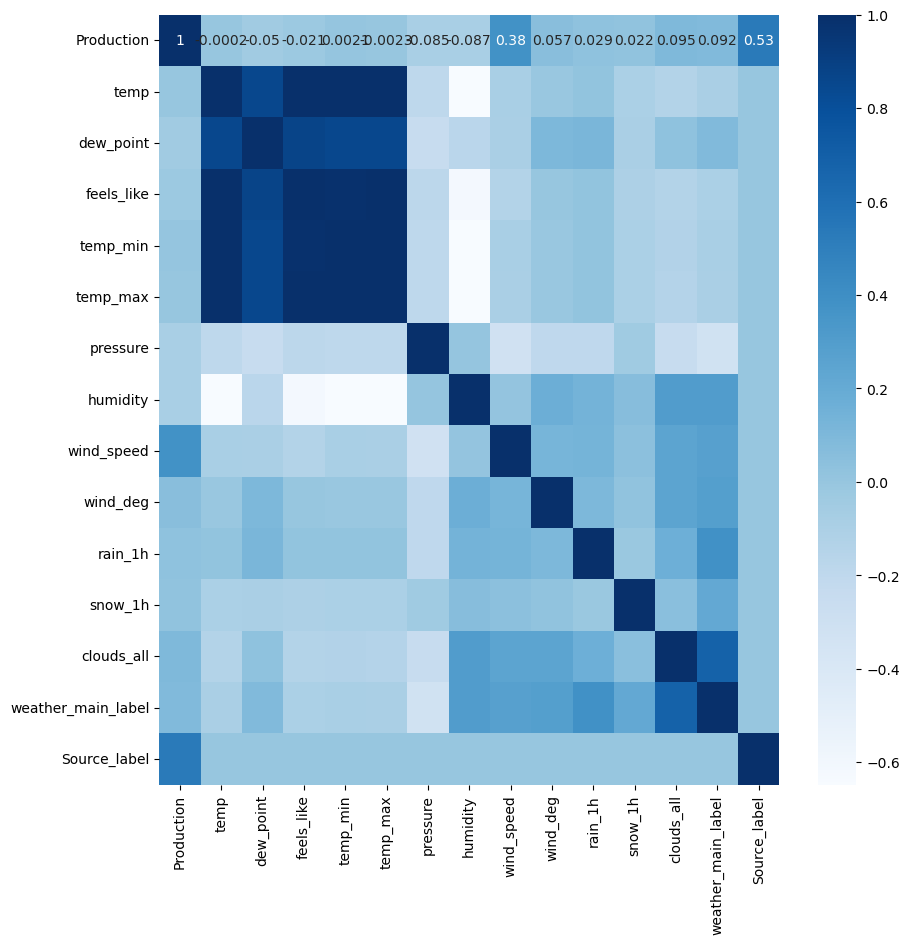

In [22]:
# visualize correlation based on heatmap
cols = [col for col in combined_dataset.columns if col not in ['dt_iso', 'Source']]
plt.subplots(figsize=(10, 10))
sns.heatmap(combined_dataset.loc[:, cols].corr(), cmap='Blues', annot=True)

In [23]:
# features like temp, temp_min, temp_max, dew_point, feels_like have extremely high correlations
# hence best to remove these features
combined_dataset.drop(['dew_point', 'temp_min', 'temp_max', 'feels_like'], axis=1, inplace=True)

In [24]:
combined_dataset['Source_label'].value_counts()

Source_label
1    25773
0    25771
Name: count, dtype: int64

In [25]:
# individual datasets for production types
wind = combined_dataset.loc[combined_dataset['Source']=='Wind'].drop(['Source', 'Source_label'], axis=1).reset_index(drop=True)
solar = combined_dataset.loc[combined_dataset['Source']=='Solar'].drop(['Source', 'Source_label'], axis=1).reset_index(drop=True)
print(wind.head())
print(solar.head())

                     dt_iso  Production   temp  pressure  humidity  \
0 2020-07-22 00:00:00+00:00      4763.0  17.31      1021        80   
1 2020-07-22 01:00:00+00:00      4653.0  16.65      1021        79   
2 2020-07-22 02:00:00+00:00      4456.0  15.85      1020        79   
3 2020-07-22 03:00:00+00:00      4268.0  15.05      1020        83   
4 2020-07-22 04:00:00+00:00      3790.0  13.95      1020        87   

   wind_speed  wind_deg  rain_1h  snow_1h  clouds_all  weather_main_label  
0        1.42        20     2.05      0.0          99                   2  
1        0.67        35     0.39      0.0          77                   2  
2        1.25       350     0.00      0.0          24                   1  
3        1.61       358     0.00      0.0           1                   0  
4        1.44       349     0.00      0.0           5                   0  
                     dt_iso  Production   temp  pressure  humidity  \
0 2020-07-22 00:00:00+00:00         0.0  17.31      1

In [26]:
# combining rows to see if they are the same date
energy_df = wind.merge(solar, on="dt_iso", suffixes=("_wind", "_solar"))
weather_df = df1[df1["dt_iso"].isin(energy_df["dt_iso"])].reset_index(drop=True)
mult_df = weather_df.merge(energy_df, on="dt_iso")
cols = [col for col in weather_df.columns]
cols.extend(['Production_wind', 'Production_solar'])
mult_df = mult_df[cols]
mult_df.drop(['dew_point', 'feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)
display(mult_df)

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Production_wind,Production_solar
0,2020-07-22 00:00:00+00:00,17.31,1021,80,1.42,20,2.05,0.0,99,2,4763.0,0.0
1,2020-07-22 01:00:00+00:00,16.65,1021,79,0.67,35,0.39,0.0,77,2,4653.0,0.0
2,2020-07-22 02:00:00+00:00,15.85,1020,79,1.25,350,0.00,0.0,24,1,4456.0,0.0
3,2020-07-22 03:00:00+00:00,15.05,1020,83,1.61,358,0.00,0.0,1,0,4268.0,0.0
4,2020-07-22 04:00:00+00:00,13.95,1020,87,1.44,349,0.00,0.0,5,0,3790.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25768,2023-06-30 17:00:00+00:00,19.74,1017,49,5.08,283,0.00,0.0,99,1,5742.0,1273.0
25769,2023-06-30 18:00:00+00:00,18.81,1017,51,5.17,287,0.00,0.0,100,1,5152.0,439.0
25770,2023-06-30 19:00:00+00:00,17.41,1017,59,4.88,285,0.00,0.0,100,1,4857.0,50.0
25771,2023-06-30 20:00:00+00:00,16.00,1018,69,4.27,272,0.00,0.0,100,1,5140.0,1.0


In [27]:
# Exploration of newly formed dataset

# correlation of solar production
solar.corr()['Production']

dt_iso                0.146642
Production            1.000000
temp                  0.431053
pressure              0.059230
humidity             -0.515530
wind_speed           -0.046564
wind_deg             -0.097286
rain_1h              -0.027843
snow_1h              -0.023935
clouds_all           -0.102453
weather_main_label   -0.072472
Name: Production, dtype: float64

In [28]:
wind.corr()['Production']

dt_iso                0.098444
Production            1.000000
temp                 -0.197388
pressure             -0.183264
humidity              0.074972
wind_speed            0.716233
wind_deg              0.148659
rain_1h               0.065466
snow_1h               0.050748
clouds_all            0.220631
weather_main_label    0.201498
Name: Production, dtype: float64

In [29]:
combined_dataset

,dt_iso,Source,Production,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source_label
0,2020-07-22 00:00:00+00:00,Wind,4763.0,17.31,1021,80,1.42,20,2.05,0.0,99,2,1
1,2020-07-22 00:00:00+00:00,Solar,0.0,17.31,1021,80,1.42,20,2.05,0.0,99,2,0
2,2020-07-22 01:00:00+00:00,Wind,4653.0,16.65,1021,79,0.67,35,0.39,0.0,77,2,1
3,2020-07-22 01:00:00+00:00,Solar,0.0,16.65,1021,79,0.67,35,0.39,0.0,77,2,0
4,2020-07-22 02:00:00+00:00,Wind,4456.0,15.85,1020,79,1.25,350,0.00,0.0,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,2023-06-30 19:00:00+00:00,Solar,50.0,17.41,1017,59,4.88,285,0.00,0.0,100,1,0
51540,2023-06-30 20:00:00+00:00,Wind,5140.0,16.00,1018,69,4.27,272,0.00,0.0,100,1,1
51541,2023-06-30 20:00:00+00:00,Solar,1.0,16.00,1018,69,4.27,272,0.00,0.0,100,1,0
51542,2023-06-30 21:00:00+00:00,Wind,6135.0,15.41,1018,75,3.81,257,0.00,0.0,100,1,1


In [30]:
combined_dataset

,dt_iso,Source,Production,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source_label
0,2020-07-22 00:00:00+00:00,Wind,4763.0,17.31,1021,80,1.42,20,2.05,0.0,99,2,1
1,2020-07-22 00:00:00+00:00,Solar,0.0,17.31,1021,80,1.42,20,2.05,0.0,99,2,0
2,2020-07-22 01:00:00+00:00,Wind,4653.0,16.65,1021,79,0.67,35,0.39,0.0,77,2,1
3,2020-07-22 01:00:00+00:00,Solar,0.0,16.65,1021,79,0.67,35,0.39,0.0,77,2,0
4,2020-07-22 02:00:00+00:00,Wind,4456.0,15.85,1020,79,1.25,350,0.00,0.0,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51539,2023-06-30 19:00:00+00:00,Solar,50.0,17.41,1017,59,4.88,285,0.00,0.0,100,1,0
51540,2023-06-30 20:00:00+00:00,Wind,5140.0,16.00,1018,69,4.27,272,0.00,0.0,100,1,1
51541,2023-06-30 20:00:00+00:00,Solar,1.0,16.00,1018,69,4.27,272,0.00,0.0,100,1,0
51542,2023-06-30 21:00:00+00:00,Wind,6135.0,15.41,1018,75,3.81,257,0.00,0.0,100,1,1


# Cleanse dataset further and improve classification

In [31]:
test_wind = combined_dataset.loc[combined_dataset['Source']=='Wind'].drop(['Source_label'], axis=1).reset_index(drop=True)
test_solar = combined_dataset.loc[combined_dataset['Source']=='Solar'].drop(['Source_label'], axis=1).reset_index(drop=True)
test_energy_df = test_wind.merge(test_solar, on="dt_iso", suffixes=("_wind", "_solar"))
test_weather_df = df1[df1["dt_iso"].isin(energy_df["dt_iso"])].reset_index(drop=True)
test_mult_df = test_weather_df.merge(test_energy_df, on="dt_iso")
cols = [col for col in weather_df.columns]
cols.extend(['Production_wind', 'Production_solar', 'Source_wind', 'Source_solar'])
test_mult_df = test_mult_df[cols]
test_mult_df.drop(['dew_point', 'feels_like', 'temp_min', 'temp_max'], axis=1, inplace=True)
display(test_mult_df)

import numpy as np
test_mult_df['Source'] = np.where(test_mult_df['Production_wind'] > test_mult_df['Production_solar'], 'Wind', 'Solar')

display(test_mult_df)

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Production_wind,Production_solar,Source_wind,Source_solar
0,2020-07-22 00:00:00+00:00,17.31,1021,80,1.42,20,2.05,0.0,99,2,4763.0,0.0,Wind,Solar
1,2020-07-22 01:00:00+00:00,16.65,1021,79,0.67,35,0.39,0.0,77,2,4653.0,0.0,Wind,Solar
2,2020-07-22 02:00:00+00:00,15.85,1020,79,1.25,350,0.00,0.0,24,1,4456.0,0.0,Wind,Solar
3,2020-07-22 03:00:00+00:00,15.05,1020,83,1.61,358,0.00,0.0,1,0,4268.0,0.0,Wind,Solar
4,2020-07-22 04:00:00+00:00,13.95,1020,87,1.44,349,0.00,0.0,5,0,3790.0,15.0,Wind,Solar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,2023-06-30 17:00:00+00:00,19.74,1017,49,5.08,283,0.00,0.0,99,1,5742.0,1273.0,Wind,Solar
25769,2023-06-30 18:00:00+00:00,18.81,1017,51,5.17,287,0.00,0.0,100,1,5152.0,439.0,Wind,Solar
25770,2023-06-30 19:00:00+00:00,17.41,1017,59,4.88,285,0.00,0.0,100,1,4857.0,50.0,Wind,Solar
25771,2023-06-30 20:00:00+00:00,16.00,1018,69,4.27,272,0.00,0.0,100,1,5140.0,1.0,Wind,Solar


,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Production_wind,Production_solar,Source_wind,Source_solar,Source
0,2020-07-22 00:00:00+00:00,17.31,1021,80,1.42,20,2.05,0.0,99,2,4763.0,0.0,Wind,Solar,Wind
1,2020-07-22 01:00:00+00:00,16.65,1021,79,0.67,35,0.39,0.0,77,2,4653.0,0.0,Wind,Solar,Wind
2,2020-07-22 02:00:00+00:00,15.85,1020,79,1.25,350,0.00,0.0,24,1,4456.0,0.0,Wind,Solar,Wind
3,2020-07-22 03:00:00+00:00,15.05,1020,83,1.61,358,0.00,0.0,1,0,4268.0,0.0,Wind,Solar,Wind
4,2020-07-22 04:00:00+00:00,13.95,1020,87,1.44,349,0.00,0.0,5,0,3790.0,15.0,Wind,Solar,Wind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25768,2023-06-30 17:00:00+00:00,19.74,1017,49,5.08,283,0.00,0.0,99,1,5742.0,1273.0,Wind,Solar,Wind
25769,2023-06-30 18:00:00+00:00,18.81,1017,51,5.17,287,0.00,0.0,100,1,5152.0,439.0,Wind,Solar,Wind
25770,2023-06-30 19:00:00+00:00,17.41,1017,59,4.88,285,0.00,0.0,100,1,4857.0,50.0,Wind,Solar,Wind
25771,2023-06-30 20:00:00+00:00,16.00,1018,69,4.27,272,0.00,0.0,100,1,5140.0,1.0,Wind,Solar,Wind


In [32]:
test_mult_df = test_mult_df.drop(['Production_wind', 'Production_solar', 'Source_wind', 'Source_solar'], axis=1)

In [33]:
labelencoder = LabelEncoder()
test_mult_df['Source_label'] = labelencoder.fit_transform(test_mult_df['Source'].values)
test_mult_df

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source,Source_label
0,2020-07-22 00:00:00+00:00,17.31,1021,80,1.42,20,2.05,0.0,99,2,Wind,1
1,2020-07-22 01:00:00+00:00,16.65,1021,79,0.67,35,0.39,0.0,77,2,Wind,1
2,2020-07-22 02:00:00+00:00,15.85,1020,79,1.25,350,0.00,0.0,24,1,Wind,1
3,2020-07-22 03:00:00+00:00,15.05,1020,83,1.61,358,0.00,0.0,1,0,Wind,1
4,2020-07-22 04:00:00+00:00,13.95,1020,87,1.44,349,0.00,0.0,5,0,Wind,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25768,2023-06-30 17:00:00+00:00,19.74,1017,49,5.08,283,0.00,0.0,99,1,Wind,1
25769,2023-06-30 18:00:00+00:00,18.81,1017,51,5.17,287,0.00,0.0,100,1,Wind,1
25770,2023-06-30 19:00:00+00:00,17.41,1017,59,4.88,285,0.00,0.0,100,1,Wind,1
25771,2023-06-30 20:00:00+00:00,16.00,1018,69,4.27,272,0.00,0.0,100,1,Wind,1


In [34]:
testing = (
    test_mult_df.groupby("Source")
    .apply(lambda x: x.sample(n=10000, random_state=42, replace=True))
    .reset_index(drop=True)
)
display(testing)

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source,Source_label
0,2021-05-28 11:00:00+00:00,21.32,1019,52,3.10,65,0.00,0.0,1,0,Solar,0
1,2022-12-10 12:00:00+00:00,-1.78,1014,83,2.57,344,0.00,0.0,99,1,Solar,0
2,2022-07-27 08:00:00+00:00,18.21,1019,69,1.70,41,0.00,0.0,44,1,Solar,0
3,2020-11-11 10:00:00+00:00,9.74,1025,96,1.93,172,0.00,0.0,45,1,Solar,0
4,2023-06-19 07:00:00+00:00,19.91,1013,94,1.17,166,0.00,0.0,94,1,Solar,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-01-30 23:00:00+00:00,7.04,998,92,3.21,199,0.20,0.0,100,2,Wind,1
19996,2021-01-07 03:00:00+00:00,1.28,1018,95,1.73,345,0.00,0.0,100,1,Wind,1
19997,2023-03-10 11:00:00+00:00,9.08,1007,73,9.28,264,0.00,0.0,100,1,Wind,1
19998,2021-05-11 03:00:00+00:00,8.29,1008,92,2.28,197,0.27,0.0,41,2,Wind,1


In [35]:
labelencoder = LabelEncoder()
testing['Source_label'] = labelencoder.fit_transform(testing['Source'].values)
testing

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Source,Source_label
0,2021-05-28 11:00:00+00:00,21.32,1019,52,3.10,65,0.00,0.0,1,0,Solar,0
1,2022-12-10 12:00:00+00:00,-1.78,1014,83,2.57,344,0.00,0.0,99,1,Solar,0
2,2022-07-27 08:00:00+00:00,18.21,1019,69,1.70,41,0.00,0.0,44,1,Solar,0
3,2020-11-11 10:00:00+00:00,9.74,1025,96,1.93,172,0.00,0.0,45,1,Solar,0
4,2023-06-19 07:00:00+00:00,19.91,1013,94,1.17,166,0.00,0.0,94,1,Solar,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-01-30 23:00:00+00:00,7.04,998,92,3.21,199,0.20,0.0,100,2,Wind,1
19996,2021-01-07 03:00:00+00:00,1.28,1018,95,1.73,345,0.00,0.0,100,1,Wind,1
19997,2023-03-10 11:00:00+00:00,9.08,1007,73,9.28,264,0.00,0.0,100,1,Wind,1
19998,2021-05-11 03:00:00+00:00,8.29,1008,92,2.28,197,0.27,0.0,41,2,Wind,1


In [36]:
mult_df

,dt_iso,temp,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main_label,Production_wind,Production_solar
0,2020-07-22 00:00:00+00:00,17.31,1021,80,1.42,20,2.05,0.0,99,2,4763.0,0.0
1,2020-07-22 01:00:00+00:00,16.65,1021,79,0.67,35,0.39,0.0,77,2,4653.0,0.0
2,2020-07-22 02:00:00+00:00,15.85,1020,79,1.25,350,0.00,0.0,24,1,4456.0,0.0
3,2020-07-22 03:00:00+00:00,15.05,1020,83,1.61,358,0.00,0.0,1,0,4268.0,0.0
4,2020-07-22 04:00:00+00:00,13.95,1020,87,1.44,349,0.00,0.0,5,0,3790.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25768,2023-06-30 17:00:00+00:00,19.74,1017,49,5.08,283,0.00,0.0,99,1,5742.0,1273.0
25769,2023-06-30 18:00:00+00:00,18.81,1017,51,5.17,287,0.00,0.0,100,1,5152.0,439.0
25770,2023-06-30 19:00:00+00:00,17.41,1017,59,4.88,285,0.00,0.0,100,1,4857.0,50.0
25771,2023-06-30 20:00:00+00:00,16.00,1018,69,4.27,272,0.00,0.0,100,1,5140.0,1.0


# Creating a regressor to predict the energy production amount

In [37]:
X = mult_df.drop(['dt_iso', 'Production_wind', 'Production_solar'], axis=1)
Y = mult_df[['Production_wind', 'Production_solar']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [113]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor


xgb_reg = XGBRegressor()

param_dist = {
    'n_estimators': [100, 200, 300, 500, 600, 700, 1000],        
    'learning_rate': [0.05, 0.1, 0.2, 0.4],        
    'max_depth': [3, 4, 5, 6, 7],               
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],     
    'sample_pos_weight': [0.1, 0.3, 0.5, 0.9],
    'gamma': [0.1, 0.3, 0.5]                  
}

rand_sear = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=7,
                                   cv=5, verbose=3)

rand_sear.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.3, learning_rate=0.4, max_depth=6, n_estimators=200, sample_pos_weight=0.5, subsample=0.6;, score=0.484 total time=   1.5s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.3, learning_rate=0.4, max_depth=6, n_estimators=200, sample_pos_weight=0.5, subsample=0.6;, score=0.466 total time=   1.3s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.3, learning_rate=0.4, max_depth=6, n_estimators=200, sample_pos_weight=0.5, subsample=0.6;, score=0.457 total time=   1.2s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.3, learning_rate=0.4, max_depth=6, n_estimators=200, sample_pos_weight=0.5, subsample=0.6;, score=0.455 total time=   1.2s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.3, learning_rate=0.4, max_depth=6, n_estimators=200, sample_pos_weight=0.5, subsample=0.6;, score=0.475 total time=   1.2s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.3, learning_rate=0.4, max_depth=3, n_estimators=500, sample_pos_weight=0.5, subsample=1.0;, score=0.527 total time=   0.9s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:26:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.3, learning_rate=0.4, max_depth=3, n_estimators=500, sample_pos_weight=0.5, subsample=1.0;, score=0.524 total time=   1.0s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.3, learning_rate=0.4, max_depth=3, n_estimators=500, sample_pos_weight=0.5, subsample=1.0;, score=0.506 total time=   0.9s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.3, learning_rate=0.4, max_depth=3, n_estimators=500, sample_pos_weight=0.5, subsample=1.0;, score=0.508 total time=   1.3s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.3, learning_rate=0.4, max_depth=3, n_estimators=500, sample_pos_weight=0.5, subsample=1.0;, score=0.525 total time=   1.1s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=700, sample_pos_weight=0.1, subsample=1.0;, score=0.528 total time=   1.4s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=700, sample_pos_weight=0.1, subsample=1.0;, score=0.525 total time=   1.8s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=700, sample_pos_weight=0.1, subsample=1.0;, score=0.508 total time=   1.7s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=700, sample_pos_weight=0.1, subsample=1.0;, score=0.505 total time=   1.9s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=700, sample_pos_weight=0.1, subsample=1.0;, score=0.515 total time=   1.5s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, sample_pos_weight=0.9, subsample=1.0;, score=0.555 total time=   3.6s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, sample_pos_weight=0.9, subsample=1.0;, score=0.560 total time=   3.6s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, sample_pos_weight=0.9, subsample=1.0;, score=0.536 total time=   3.8s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, sample_pos_weight=0.9, subsample=1.0;, score=0.532 total time=   4.2s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=1000, sample_pos_weight=0.9, subsample=1.0;, score=0.552 total time=   4.1s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.1, learning_rate=0.4, max_depth=3, n_estimators=600, sample_pos_weight=0.3, subsample=0.9;, score=0.525 total time=   1.8s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.1, learning_rate=0.4, max_depth=3, n_estimators=600, sample_pos_weight=0.3, subsample=0.9;, score=0.525 total time=   1.9s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.1, learning_rate=0.4, max_depth=3, n_estimators=600, sample_pos_weight=0.3, subsample=0.9;, score=0.498 total time=   2.2s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.1, learning_rate=0.4, max_depth=3, n_estimators=600, sample_pos_weight=0.3, subsample=0.9;, score=0.506 total time=   2.5s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.1, learning_rate=0.4, max_depth=3, n_estimators=600, sample_pos_weight=0.3, subsample=0.9;, score=0.519 total time=   2.7s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=700, sample_pos_weight=0.1, subsample=0.9;, score=0.541 total time=   3.6s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=700, sample_pos_weight=0.1, subsample=0.9;, score=0.546 total time=   3.8s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=700, sample_pos_weight=0.1, subsample=0.9;, score=0.521 total time=   4.3s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:27:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=700, sample_pos_weight=0.1, subsample=0.9;, score=0.523 total time=   4.3s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=5, n_estimators=700, sample_pos_weight=0.1, subsample=0.9;, score=0.544 total time=   3.6s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=1000, sample_pos_weight=0.3, subsample=0.9;, score=0.544 total time=   4.3s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=1000, sample_pos_weight=0.3, subsample=0.9;, score=0.534 total time=   5.5s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=1000, sample_pos_weight=0.3, subsample=0.9;, score=0.516 total time=   4.5s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=1000, sample_pos_weight=0.3, subsample=0.9;, score=0.513 total time=   4.1s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=1000, sample_pos_weight=0.3, subsample=0.9;, score=0.535 total time=   4.7s


C:\ZPayload\shrey\Jupyter_files\lib\site-packages\xgboost\core.py:160: UserWarning: [20:28:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=7,
                   param_distributions={'gamma': [0.1, 0.3, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.4],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 500,
                                                         600, 700, 1000],
                                        'sample_pos_weight': [0.1, 0.3, 0.5,
                                                              0.9],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   verbose=3)

In [114]:
best_params = rand_sear.best_params_
print("Best parameters:", best_params)

Best parameters: {'subsample': 1.0, 'sample_pos_weight': 0.9, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1}


## XGBRegressor without MultioutptuRegressor

In [39]:
xgb_reg = XGBRegressor(subsampl = 1.0, sample_pos_weight = 0.9, n_estimators = 1000, max_depth = 5, learning_rate = 0.1, gamma = 0.1)
xgb_reg.fit(X_train, y_train)

C:\Users\shaga\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:45:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight", "subsampl" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred = xgb_reg.predict(X_test)

In [41]:
mse_sol = mean_squared_error(y_test['Production_solar'], y_pred[:, 1], squared=False)
mse_wind = mean_squared_error(y_test['Production_wind'], y_pred[:, 0], squared=False)
print('Root Mean squared error(Solar) :', round(mse_sol, 4))
print('Root Mean Squared Error(Wind): ', round(mse_wind,4))

Root Mean squared error(Solar) : 1199.562
Root Mean Squared Error(Wind):  1846.3441


C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Wind Production')

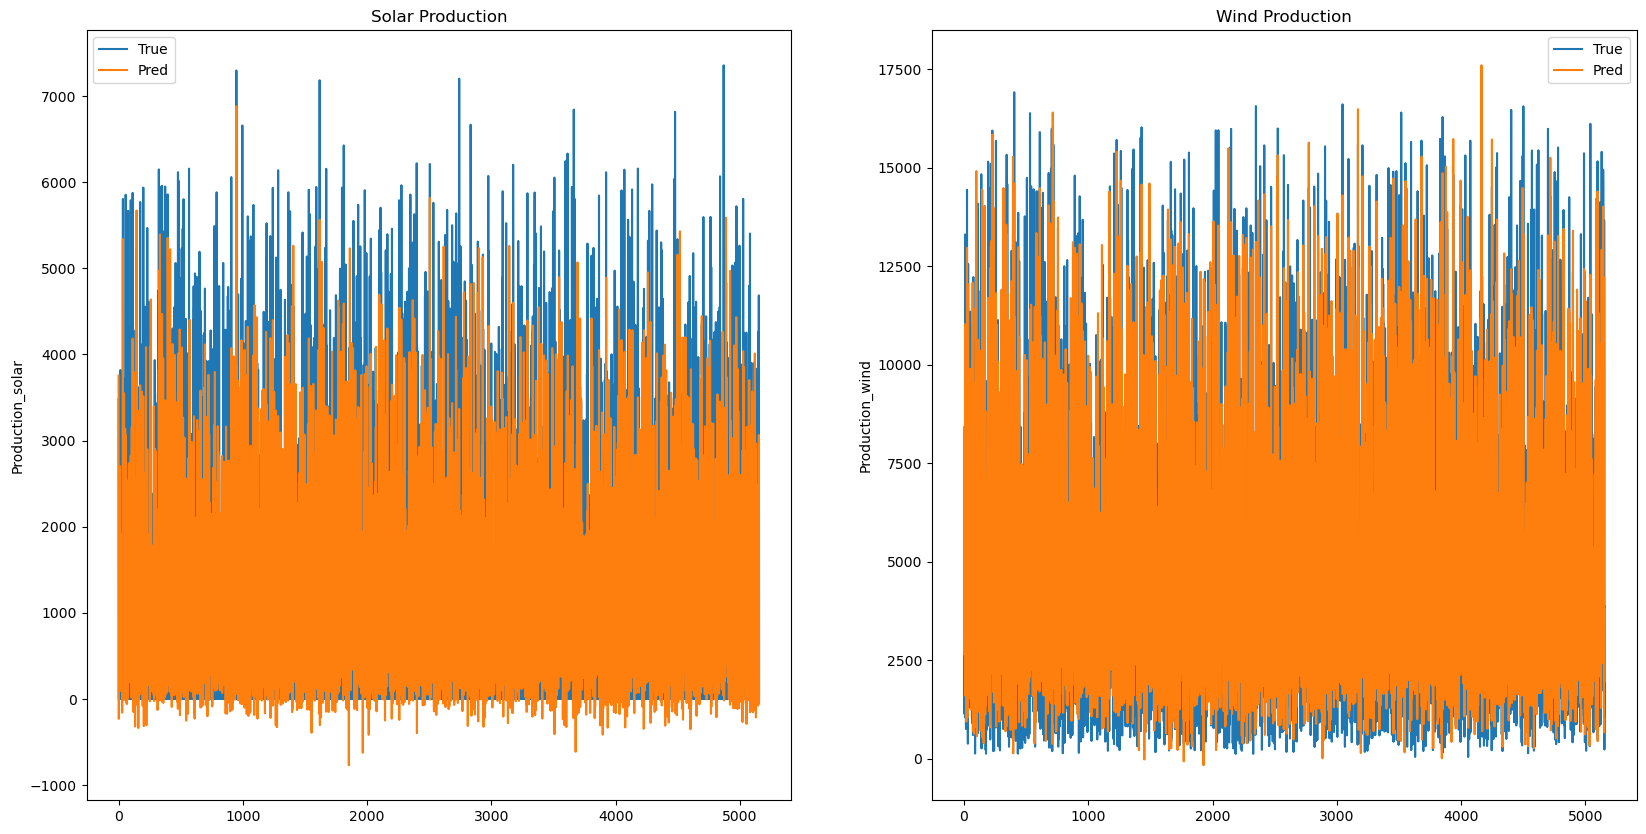

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(y_pred[:, 1], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')

sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[1])
sns.lineplot(y_pred[:, 0], label='Pred', ax=axes[1])
axes[1].set_title('Wind Production')

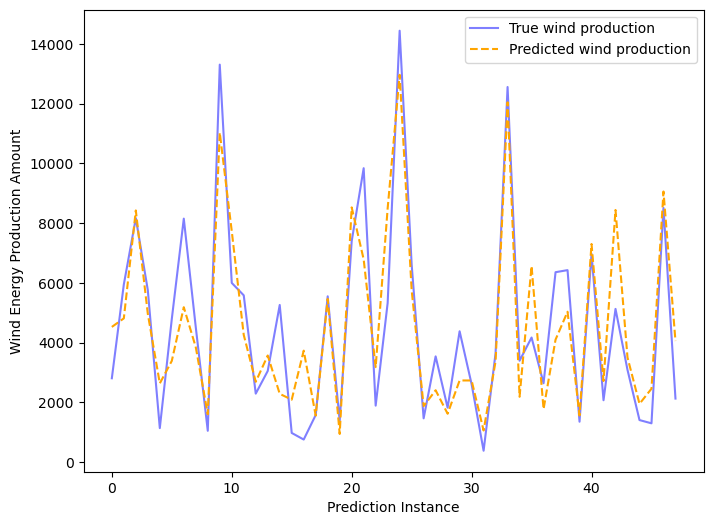

In [43]:
range_n = 24 * 2
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(
    y_test['Production_wind'].to_list()[:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    y_pred[:, 0][:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.xlabel(xlabel='Prediction Instance')
plt.ylabel(ylabel="Wind Energy Production Amount")
plt.legend()
plt.show()

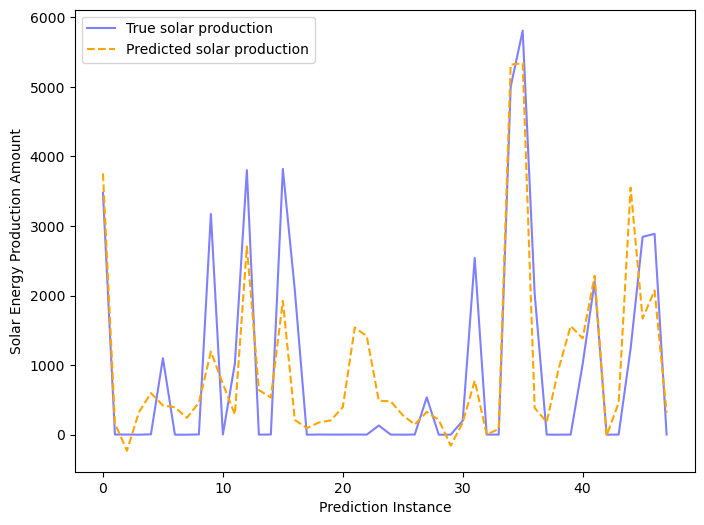

In [44]:
range_n = 24 * 2
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(
    y_test['Production_solar'].to_list()[:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    y_pred[:, 1][:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.xlabel(xlabel='Prediction Instance')
plt.ylabel(ylabel="Solar Energy Production Amount")
plt.legend()
plt.show()

## XGBRegressor using the MultioutputRegressor

In [44]:
xgb_reg = XGBRegressor(subsampl = 1.0, sample_pos_weight = 0.9, n_estimators = 1000, max_depth = 5, learning_rate = 0.1, gamma = 0.1)
mult_out_xgb_reg = MultiOutputRegressor(xgb_reg)
mult_out_xgb_reg.fit(X_train, y_train)

C:\Users\shaga\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:41:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight", "subsampl" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shaga\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sample_pos_weight", "subsampl" } are not used.

  warnings.warn(smsg, UserWarning)


MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [45]:
y_pred = mult_out_xgb_reg.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
mse_sol = mean_squared_error(y_test['Production_solar'], y_pred[:, 1], squared=False)
mse_wind = mean_squared_error(y_test['Production_wind'], y_pred[:, 0], squared=False)
mse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean squared error(Solar) :', round(mse_sol, 4))
print('Root Mean Squared Error(Wind): ', round(mse_wind,4))
print('Combined Model RMSE: ', round(mse, 4))
r2_sol = r2_score(y_test['Production_solar'], y_pred[:, 1])
r2_wind = r2_score(y_test['Production_wind'], y_pred[:, 0])
print('r squared error(Solar) :', round(r2_sol, 4))
print('r squared error(wind) :', round(r2_wind, 4))

Root Mean squared error(Solar) : 1196.4296
Root Mean Squared Error(Wind):  1844.1227
Combined Model RMSE:  1520.2761
r squared error(Solar) : 0.4146
r squared error(wind) : 0.728


C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shaga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Wind Production')

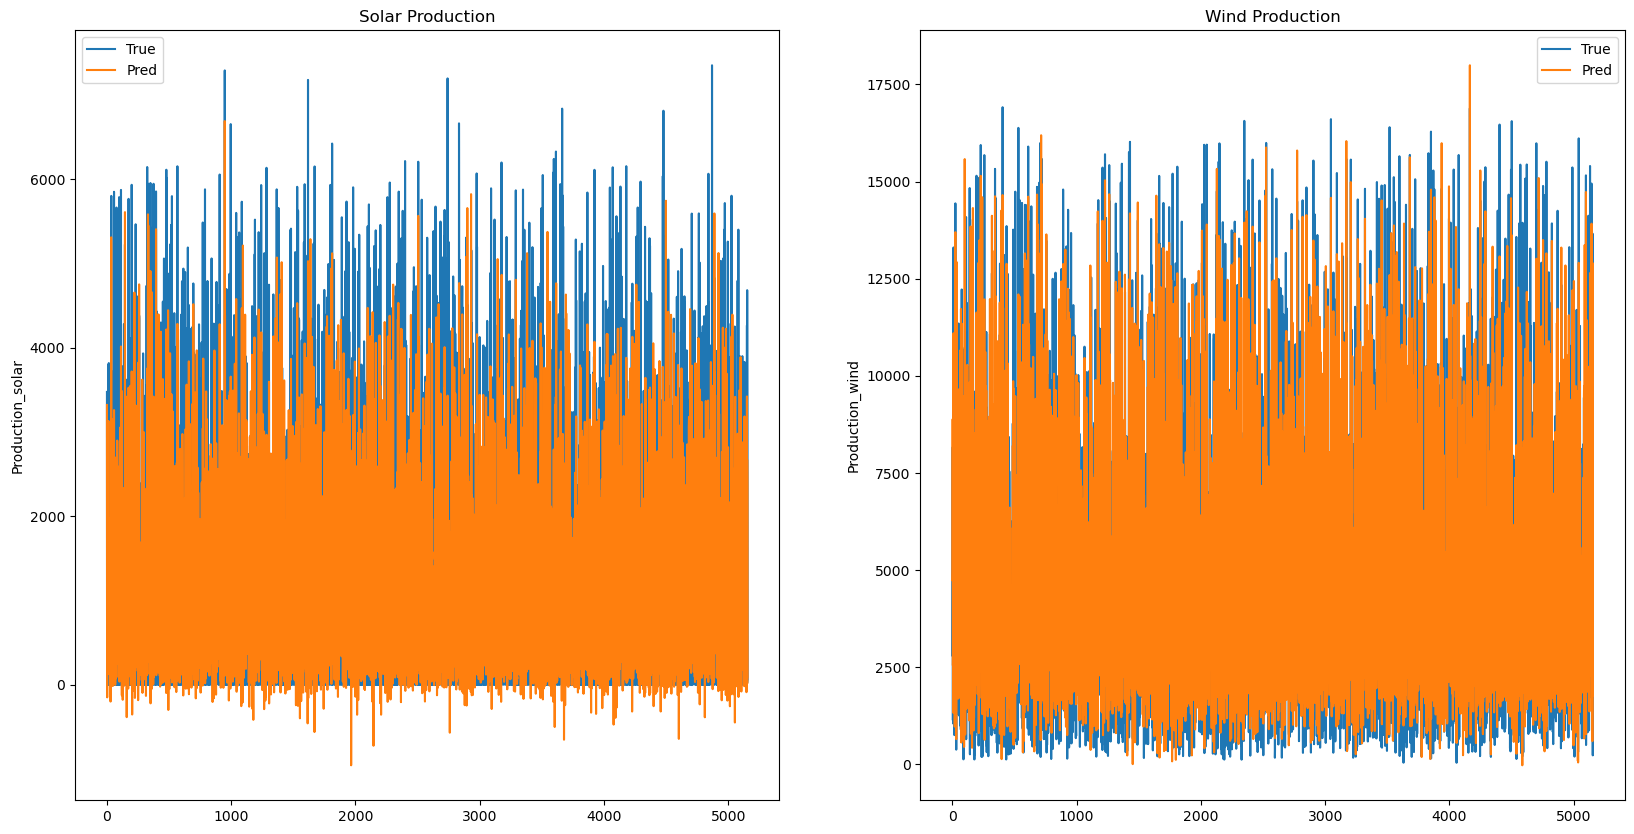

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.lineplot(y_test.reset_index()['Production_solar'], label='True', ax=axes[0])
sns.lineplot(y_pred[:, 1], label='Pred', ax=axes[0])
axes[0].set_title('Solar Production')

sns.lineplot(y_test.reset_index()['Production_wind'], label='True', ax=axes[1])
sns.lineplot(y_pred[:, 0], label='Pred', ax=axes[1])
axes[1].set_title('Wind Production')

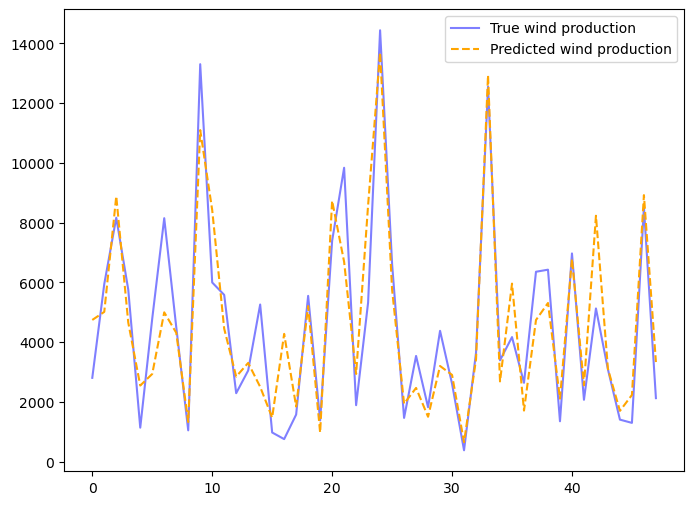

In [96]:
range_n = 24 * 2
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(
    y_test['Production_wind'].to_list()[:range_n],
    label="True wind production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    y_pred[:, 0][:range_n],
    label="Predicted wind production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.show()

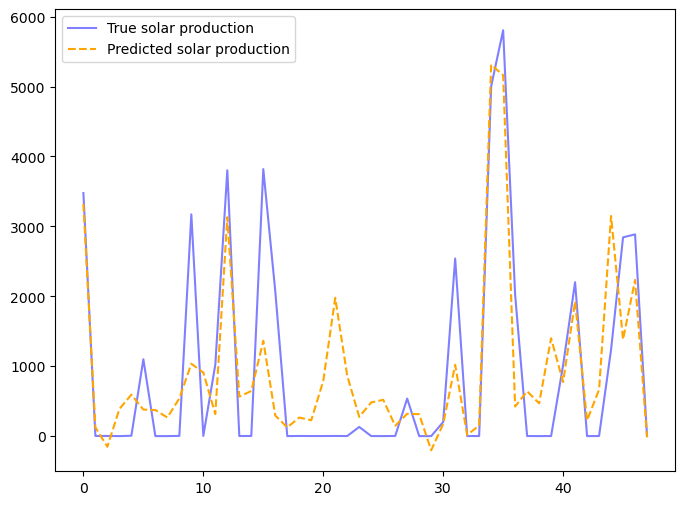

In [97]:
range_n = 24 * 2
figsize = (8, 6)
plt.figure(figsize=figsize)
plt.plot(
    y_test['Production_solar'].to_list()[:range_n],
    label="True solar production",
    color="blue",
    linestyle="solid",
    alpha=0.5,
)
plt.plot(
    y_pred[:, 1][:range_n],
    label="Predicted solar production",
    color="orange",
    linestyle="dashed",
)
plt.legend()
plt.show()

# Training XGBClassifier on combined dataset

In [157]:
from sklearn.model_selection import train_test_split
X = combined_dataset.drop(['Source', 'Source_label', 'dt_iso', 'Production'], axis=1)
Y = combined_dataset['Source_label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

mod_cv = XGBClassifier()
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 100, None],
    'n_estimators': [100, 200, 400, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0.01, 0.1, 0.5, 1],
    'scale_pos_weight': [0.1, 0.4, 0.6, 1.0, 2.0]
}
r_search = RandomizedSearchCV(estimator=mod_cv, param_distributions=param_grid, n_iter=10, cv=10, verbose=3, random_state=42, n_jobs=-1)

r_search.fit(X_train, y_train)

best_params = r_search.best_params_
print("Best parameters:", best_params)



Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'scale_pos_weight': 0.1, 'n_estimators': 400, 'max_depth': 30, 'learning_rate': 0.1, 'gamma': 0.1}


In [158]:
# Training data on the combined dataset
from xgboost import XGBClassifier
cf_model = XGBClassifier(scale_pos_weight = 0.1, n_estimators = 400, max_depth = 30, learning_rate = 0.1, gamma = 0.1)
cf_model.fit(X_train, y_train)

y_pred = cf_model.predict(X_test)


In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.4990784751188282
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5145
           1       0.00      0.00      0.00      5164

    accuracy                           0.50     10309
   macro avg       0.25      0.50      0.33     10309
weighted avg       0.25      0.50      0.33     10309



C:\ZPayload\shrey\Jupyter_files\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ZPayload\shrey\Jupyter_files\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ZPayload\shrey\Jupyter_files\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Classification on further cleansed dataset

In [58]:
# trying to perform classification on test_mult_df prior to downsampling and upsampling
X = test_mult_df.drop(['dt_iso', 'Source', 'Source_label'], axis=1)
Y = test_mult_df['Source_label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [148]:
xgb_cross_val = XGBClassifier()
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 100, None],
    'n_estimators': [100, 200, 400, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0.01, 0.1, 0.5, 1],
    #'scale_pos_weight': [0.1, 0.4, 0.6, 1.0, 2.0]
}
r_search = RandomizedSearchCV(estimator=xgb_cross_val, param_distributions=param_grid, n_iter=16, cv=5, verbose=3, random_state=42, n_jobs=-1)

r_search.fit(X_train, y_train)

best_params = r_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'n_estimators': 600, 'max_depth': 100, 'learning_rate': 0.1, 'gamma': 0.01}


In [145]:
#xgb_model = XGBClassifier(n_estimators = 600, max_depth = 100, learning_rate = 0.01, gamma = 0.1, scale_pos_weight = 2.0)
xgb_model = XGBClassifier(n_estimators = 600, max_depth = 100, learning_rate = 0.1, gamma = 0.01)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
y_pred = xgb_model.predict(X_test)

In [150]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8783705140640156
              precision    recall  f1-score   support

           0       0.73      0.45      0.55       874
           1       0.90      0.97      0.93      4281

    accuracy                           0.88      5155
   macro avg       0.81      0.71      0.74      5155
weighted avg       0.87      0.88      0.87      5155



In [165]:
X_gr = testing.drop(['dt_iso', 'Source', 'Source_label'], axis=1)
Y_gr = testing['Source_label']

X_train_gr, X_test_gr, y_train_gr, y_test_gr = train_test_split(X_gr, Y_gr, test_size=0.2, shuffle=True, random_state=42)

In [77]:
mod_cv = XGBClassifier()
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 100, None],
    'n_estimators': [100, 200, 400, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0.01, 0.1, 0.5, 1],
    #'scale_pos_weight': [0.1, 0.4, 0.6, 1.0, 2.0]
}
r_search = RandomizedSearchCV(estimator=mod_cv, param_distributions=param_grid, n_iter=10, cv=5, verbose=3, random_state=42, n_jobs=-1)

r_search.fit(X_train_gr, y_train_gr)

best_params = r_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 600, 'max_depth': 100, 'learning_rate': 0.1, 'gamma': 0.01}


In [167]:
# Base classifier
mod = XGBClassifier()
mod.fit(X_train_gr, y_train_gr)
y_pred = mod.predict(X_test_gr)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:", accuracy_score(y_test_gr, y_pred))
report = classification_report(y_test_gr, y_pred)
print(report)

Accuracy: 0.877
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2019
           1       0.89      0.85      0.87      1981

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



In [168]:
# Using hyperparameters to train
mod = XGBClassifier(n_estimators = 600, max_depth = 100, learning_rate = 0.1, gamma = 0.01)
mod.fit(X_train_gr, y_train_gr)
y_pred = mod.predict(X_test_gr)


In [169]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:", accuracy_score(y_test_gr, y_pred))
report = classification_report(y_test_gr, y_pred)
print(report)

Accuracy: 0.922
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2019
           1       0.95      0.89      0.92      1981

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000



### We attempted to perform classification on the data to classify the source as solar or wind. The results however, while no terrible, were not satisfactory enough. We tried on several different cleansed versions using a baseline form and a hyperparameter tuned format. 